In [1]:
from tqdm import tqdm
import scipy.stats as sts
import scipy as sc
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.special as sp

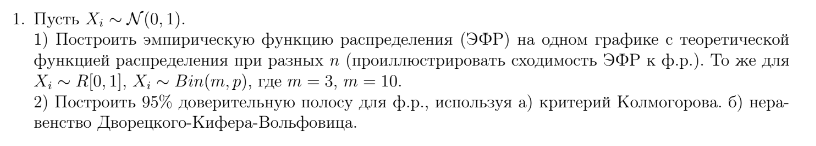

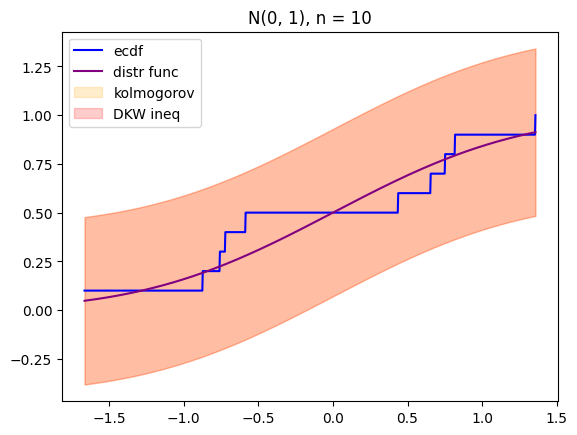

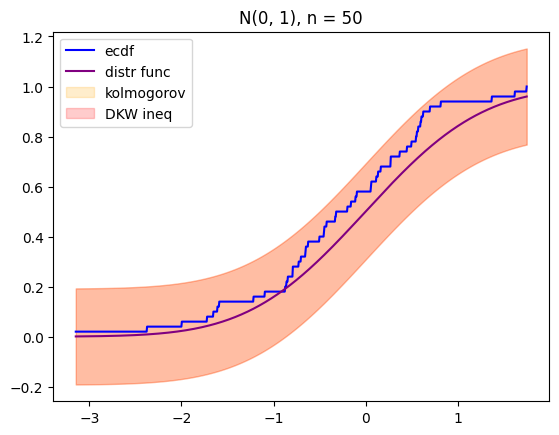

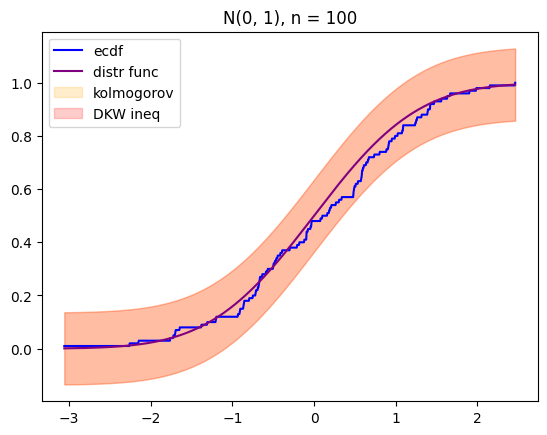

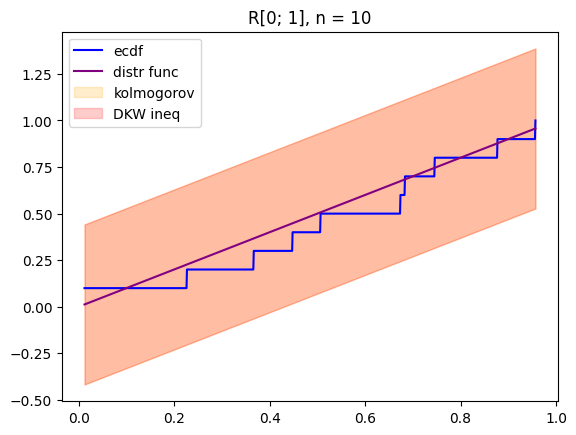

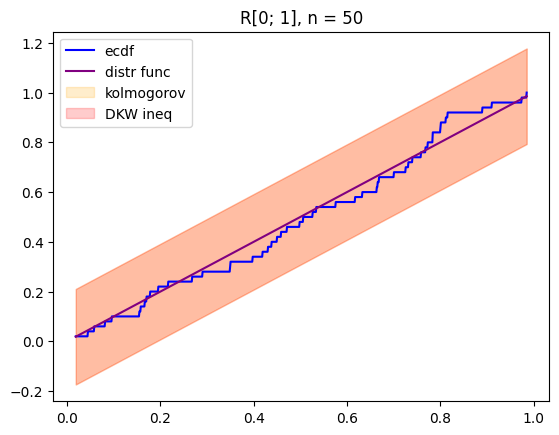

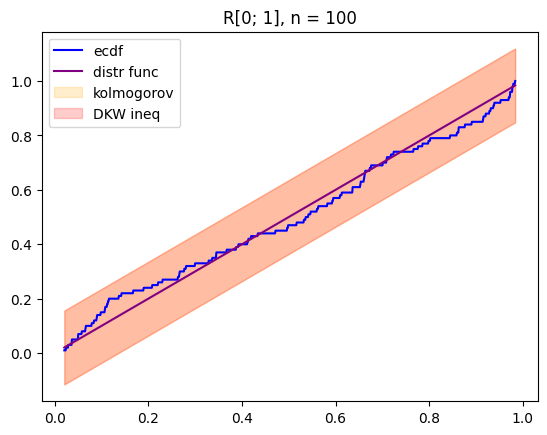

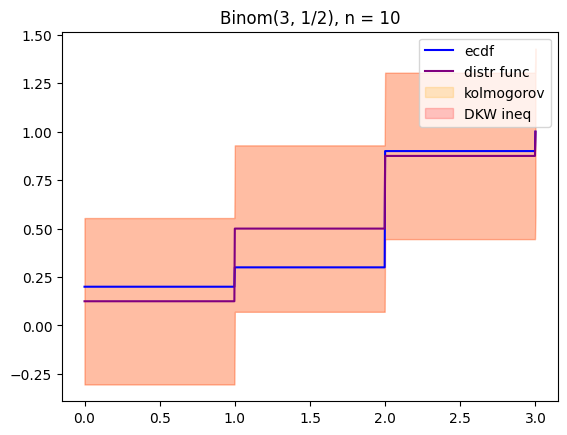

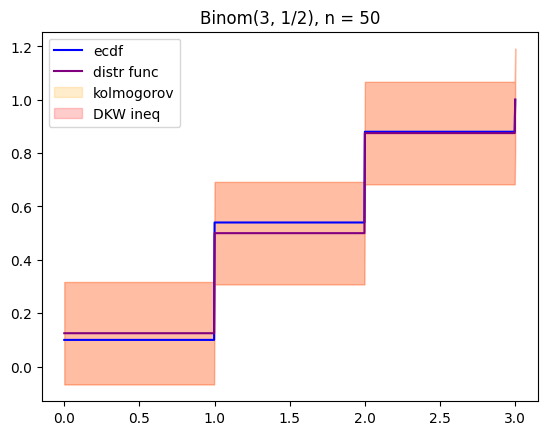

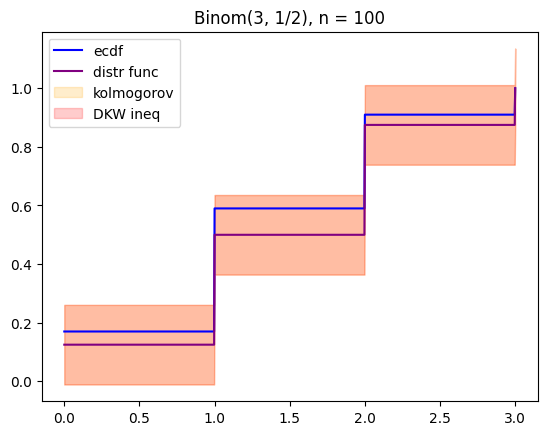

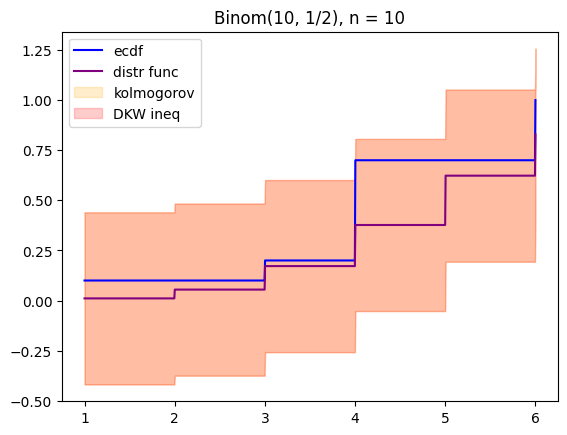

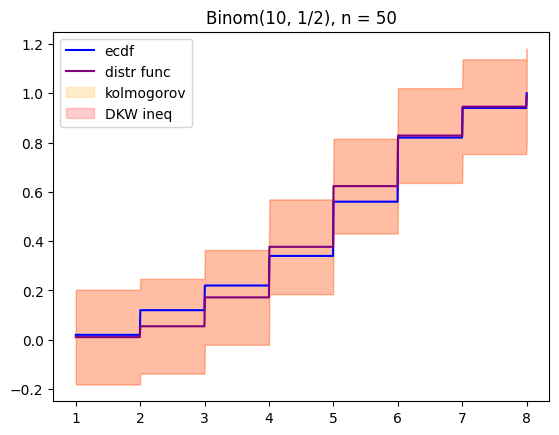

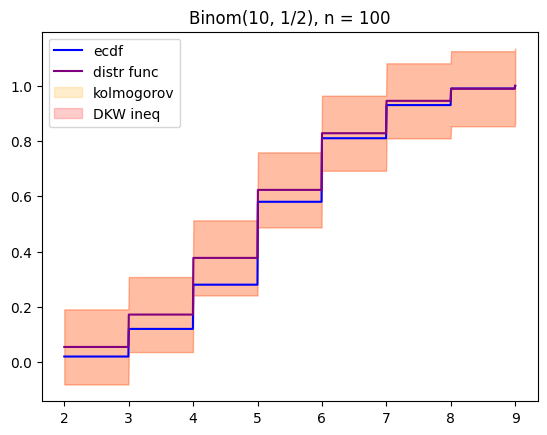

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF
N = [10, 50, 100]
def plot(X, dist_name, n):
    plt.figure()
    ecdf = ECDF(X)
    x = np.linspace(min(X), max(X), 1000)
    y = ecdf(x)
    plt.plot(x, y, label='ecdf', color = 'blue')
    if dist_name == 'N(0, 1)':
        cdf = sts.norm.cdf(x, loc = 0, scale = 1)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'R[0; 1]':
        cdf = sts.uniform.cdf(x, loc = 0, scale = 1)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'Binom(3, 1/2)':
        cdf = sts.binom.cdf(x, n = 3, p = 0.5)
        res = sts.kstwobign.ppf(0.95)
    elif dist_name == 'Binom(10, 1/2)':
        cdf = sts.binom.cdf(x, n = 10, p = 0.5)
        res = sts.kstwobign.ppf(0.95)
    plt.plot(x, cdf, label='distr func', color = 'purple')
    plt.fill_between(x, cdf - res/np.sqrt(n), cdf + res/np.sqrt(n), color = 'orange', alpha = 0.2, label = "kolmogorov")
    eps = np.sqrt((1/(2*n)) * np.log(2/0.05))
    plt.fill_between(x, cdf - eps, cdf + eps, color = 'red', alpha = 0.2, label = "DKW ineq")

    plt.title(dist_name + ', n = ' + str(n))
    plt.legend(loc="best")
    plt.show()
for n in N:
    X = sts.norm.rvs(size = n)
    plot(X, 'N(0, 1)', n)

for n in N:
    X = sts.uniform(loc = 0, scale = 1).rvs(size = n)
    plot(X, 'R[0; 1]', n)

for n in N:
    X = sts.binom(n = 3, p = 0.5).rvs(size = n)
    plot(X, 'Binom(3, 1/2)', n)

for n in N:
    X = sts.binom(n = 10, p = 0.5).rvs(size = n)
    plot(X, 'Binom(10, 1/2)', n)

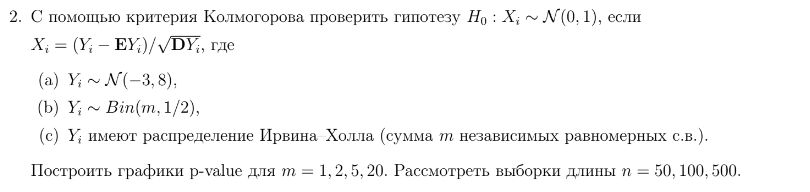

N(0,1)
Hypothesis acceptance for n = 50: False. Pvalue: 0.8337190534558822
Hypothesis acceptance for n = 100: False. Pvalue: 0.5898245181483183
Hypothesis acceptance for n = 500: False. Pvalue: 0.968697713445298

Bin(1, 1/2)
Hypothesis acceptance for n = 50: True. Pvalue: 1.8174927631787727e-07
Bin(2, 1/2)
Hypothesis acceptance for n = 50: True. Pvalue: 0.00035610539330438364
Bin(5, 1/2)
Hypothesis acceptance for n = 50: False. Pvalue: 0.06562815508468978
Bin(20, 1/2)
Hypothesis acceptance for n = 50: False. Pvalue: 0.14646958545761612

Bin(1, 1/2)
Hypothesis acceptance for n = 100: True. Pvalue: 3.1288238611915395e-11
Bin(2, 1/2)
Hypothesis acceptance for n = 100: True. Pvalue: 3.6846712714883516e-05
Bin(5, 1/2)
Hypothesis acceptance for n = 100: True. Pvalue: 0.00010361915509771478
Bin(20, 1/2)
Hypothesis acceptance for n = 100: False. Pvalue: 0.09673173018601218

Bin(1, 1/2)
Hypothesis acceptance for n = 500: True. Pvalue: 7.8907043793726905e-53
Bin(2, 1/2)
Hypothesis acceptance for

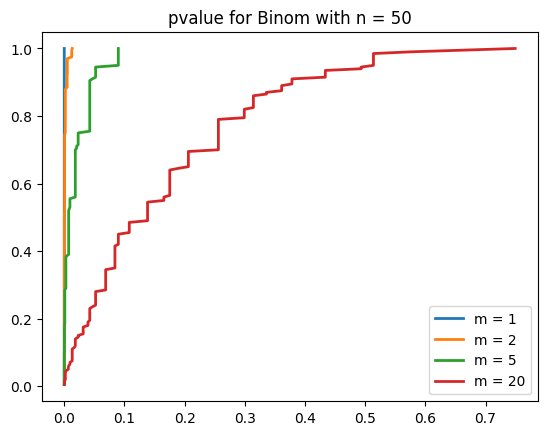

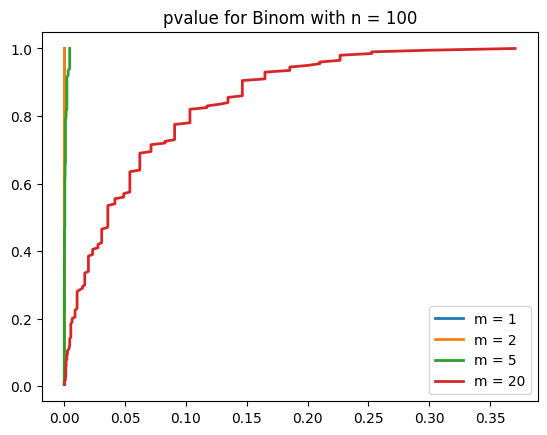

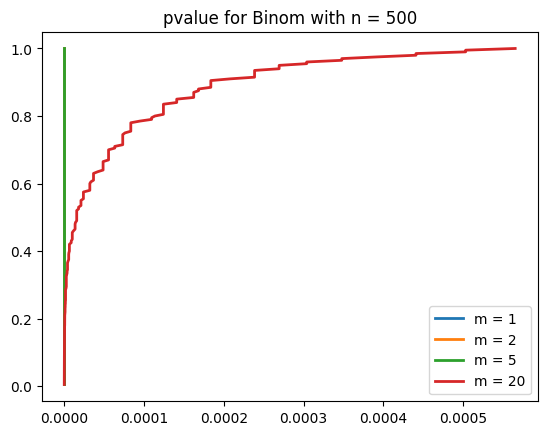

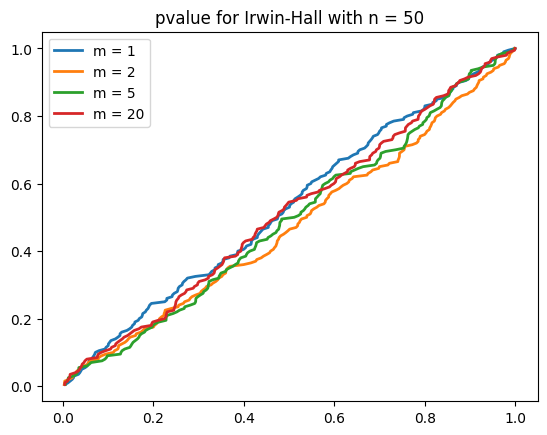

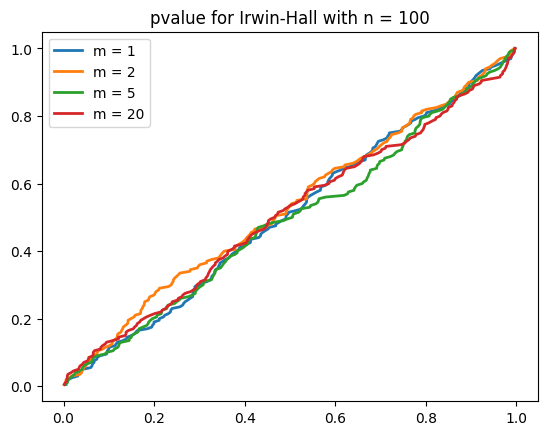

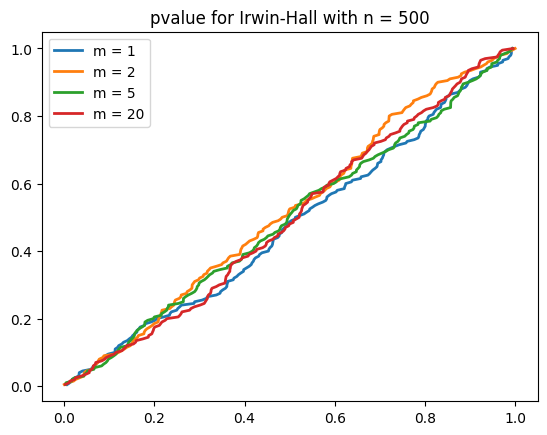

In [2]:
from statsmodels.distributions.empirical_distribution import ECDF
def pval_bin(n:int, k:int):
    m = 200
    result = []
    for j in range (m):
        Y = sts.binom.rvs(n = k, p = 1/2, size=n)
        Sample = (Y - k*1/2)/np.sqrt(k/4)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result, sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"m = {k}")

def pval_ih(n:int, k:int):
    m = 200
    result = []
    for j in range (m):
        Y = np.sum(np.random.uniform(size=(m, n)), axis=0)
        Sample = (Y - m*1/2)/np.sqrt(m/12)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result,sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2, label = f"m = {k}")

N = [50, 100, 500]
M = [1,2,5,20]
def task(Y, n):
    pvalue_test = 0.05
    X = (Y - np.mean(Y))/np.std(Y)
    x = np.linspace(min(Y), max(Y), 1000)
    res = sts.kstest(X, 'norm').pvalue
    h_accepted = res < pvalue_test
    print(f"Hypothesis acceptance for n = {n}: {h_accepted}. Pvalue: {res}")

print("N(0,1)")
for n in N:
    Y = sts.norm.rvs(loc = -3, scale = np.sqrt(8), size = n)
    task(Y, n)
print("")
for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue for Binom with n = {n}")
    for m in M:
        print(f"Bin({m}, 1/2)")
        Y = sts.binom.rvs(n = m, p = 1/2, size = n)
        task(Y, n)
        pval_bin(n, m)
    ax.legend()
    print("")

for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue for Irwin-Hall with n = {n}")
    for m in M:
        print(f"Irwin-Hall({m})")
        Y = np.sum(np.random.uniform(size=(m, n)), axis=0)
        task(Y, n)
        pval_ih(n,m)
    ax.legend()
    print("")

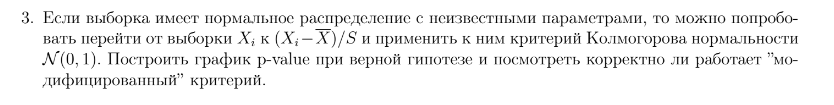

Hypothesis test: False

Hypothesis test: False

Hypothesis test: False



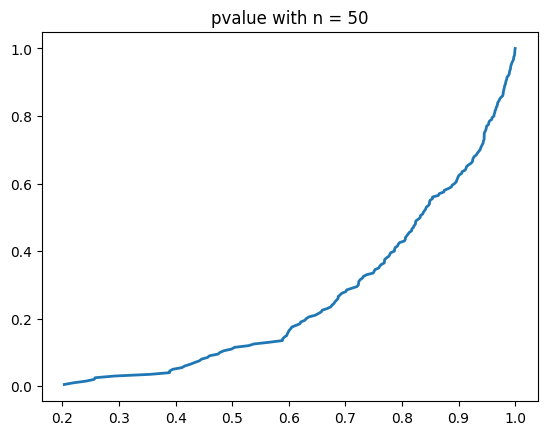

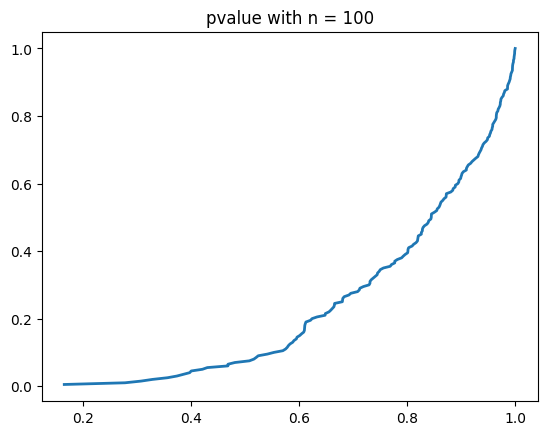

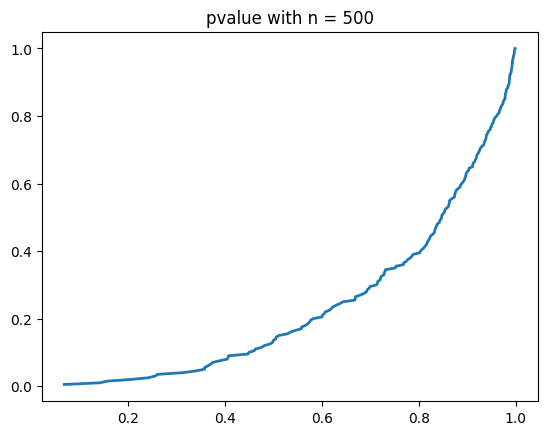

In [3]:
N = [50, 100, 500]
def pval(n:int):
    m = 200
    result = []
    for j in range (m):
        Y = sts.norm.rvs(loc = 10, scale = 20, size = n)
        Sample = (Y - np.mean(Y))/np.std(Y)
        sample_val = sts.kstest(Sample, 'norm')
        result = np.append(result,sample_val.pvalue)
    result = np.sort(result)
    y_vals = [(i+1)/m for i in range(m)]
    ax.plot(result, y_vals, lw = 2)

for n in N:
    fig, ax = plt.subplots()
    plt.title(f"pvalue with n = {n}")
    Y = sts.norm.rvs(loc = 10, scale = 20, size = n)
    Sample = (Y - np.mean(Y))/np.std(Y)
    sample_val = sts.kstest(Sample, 'norm')
    print(f"Hypothesis test: {sample_val.pvalue < 0.05}")
    pval(n)
    print("")